### Script to test out if TC track masking is working

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib
from matplotlib import ticker, cm
import matplotlib.pyplot as plt
import sys
import cartopy
import subprocess
from mask_tc_track import mask_tc_track

In [2]:
# TC tracking
ptrack='600' # tracking pressure level
var_track = 'rvor' # variable
rmax = 6 # radius (km) limit to keep unmasked

# #### Time selection

nd = 3 # ndays
nt = nd*24
hr_tag = str(np.char.zfill(str(nt), 2))

t0=36
t0+=1 # add one time step since NCRF(t=0) = CTL
t1 = t0+nt

# #### Directories

figdir = "/home/jamesrup/figures/tc/ens/haiyan/"
main = "/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/wrfenkf/haiyan/"

datdir2 = 'post/d02/'

datdir = main+'memb_01/ctl/'+datdir2

In [3]:
##### Get dimensions
process = subprocess.Popen(['ls '+main+'memb_01/ctl/wrfout_d02_*'],shell=True,
    stdout=subprocess.PIPE,universal_newlines=True)
output = process.stdout.readline()
wrffil = output.strip() #[3]
varfil_main = Dataset(wrffil)
lat = varfil_main.variables['XLAT'][:][0] # deg
lon = varfil_main.variables['XLONG'][:][0] # deg
lat1d = lat[:,0]
lon1d = lon[0,:]
nx1 = lat1d.size
nx2 = lon1d.size
varfil_main.close()

In [4]:
varfil = Dataset(datdir+'W.nc') # this opens the netcdf file
# var = varfil.variables['W'][t0:t1,:,:,:] # m/s
var = varfil.variables['W'][t0:t1,0:2,:,:] # m/s
varfil.close()

In [5]:
var.shape

(72, 2, 740, 1400)

In [6]:
track_file = main+'memb_01/ctl/track_rvor_600hPa.nc'
var_mask = mask_tc_track(track_file, rmax, var, lon, lat, t0, t1)

var_mask.shape


(72, 2, 740, 1400)

---
### Plotting routines

In [7]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

##### Plot time-varying 3D radius map

In [8]:
# # select plotting area
# plt_area=[np.min(lon1d), np.max(lon1d), np.min(lat1d), np.max(lat1d)] # W,E,S,N
# # plt_area=[145, np.max(lon), 0, 15] # W,E,S,N

# # tsel=36
# # for tsel in range(5,nt,6):
# for tsel in range(50,51):
    
#     hr_tag = str(np.char.zfill(str(tsel), 3))
    
#     # iu = u[tsel,:,:]
#     # iv = v[tsel,:,:]
#     pltvar=radius3d[tsel,:,:]

#     # create figure
#     fig = plt.figure(figsize=(20,10))
#     ax = fig.add_subplot(111,projection=cartopy.crs.PlateCarree())
#     ax.set_title('600' + ' hPa RVor (hr='+hr_tag+')', fontsize=20)

#     # fill contour
#     clevs = np.arange(0,50)

#     im = ax.contourf(lon, lat, pltvar, clevs, cmap='RdBu_r', alpha=0.6,
#                      extend='max', zorder=2)

#     cbar = plt.colorbar(im, ax=ax, shrink=0.75, ticks=ticker.AutoLocator())
#     cbar.ax.set_ylabel('sigma')
#             # cbar = plt.colorbar(im, ax=ax, shrink=0.75, ticks=ticker.AutoLocator)

#     # storm track
#     plt.plot(clon, clat, color="black", linewidth=2)
#     plt.plot(clon, clat, "s", color="black")
#     # current time
#     plt.plot(clon[t0+tsel], clat[t0+tsel], "s", color="blue", markersize=15)
#     # all-time max (time step 168)
#     # plt.plot(lon1d[mloc2[2]], lat1d[mloc2[1]], "s", color="blue", markersize=15)

#     # add map features
#     ax.add_feature(cartopy.feature.LAND,facecolor="lightgray") #land color
#     # ax.add_feature(cartopy.feature.OCEAN) #ocean color
#     ax.add_feature(cartopy.feature.COASTLINE)
#     # ax.add_feature(cartopy.feature.STATES)
#     ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

#     # Zoom into selected area (comment this out to plot entire available area)
#     ax.set_extent(plt_area)

#     plt.show()
#     # plt.close()

##### Plot masked variable radius map

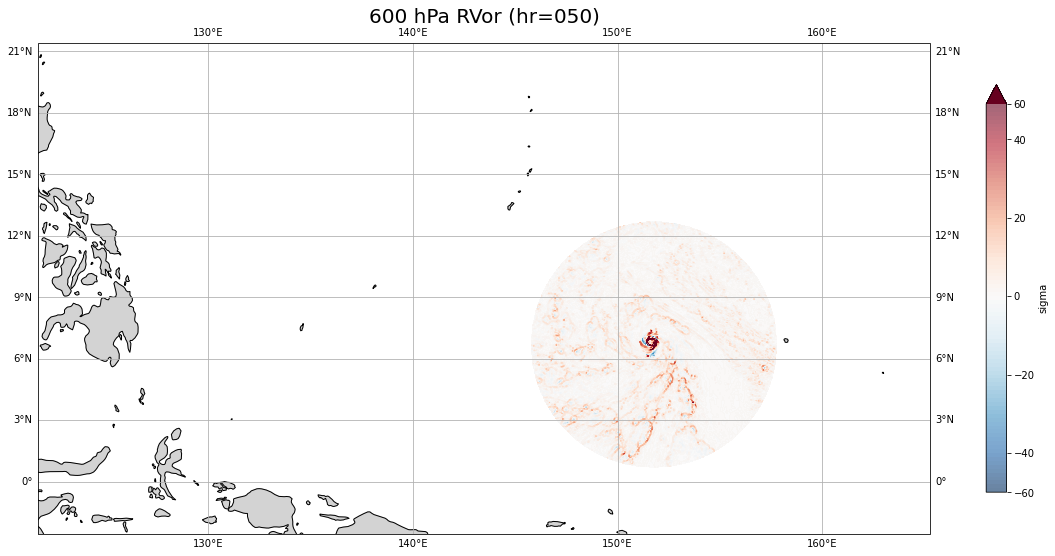

In [9]:
# select plotting area
plt_area=[np.min(lon1d), np.max(lon1d), np.min(lat1d), np.max(lat1d)] # W,E,S,N
# plt_area=[145, np.max(lon), 0, 15] # W,E,S,N

# tsel=36
# for tsel in range(5,nt,6):
for tsel in range(50,51):
    
    hr_tag = str(np.char.zfill(str(tsel), 3))
    
    # iu = u[tsel,:,:]
    # iv = v[tsel,:,:]
#     pltvar=var_mask[tsel,5,:,:]
    pltvar=var_mask[tsel,0,:,:]*1e2

    # create figure
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111,projection=cartopy.crs.PlateCarree())
    ax.set_title('600' + ' hPa RVor (hr='+hr_tag+')', fontsize=20)

    # fill contour
    clevs = np.arange(-50,50)

    im = ax.contourf(lon, lat, pltvar, clevs, cmap='RdBu_r', alpha=0.6,
                     extend='max', zorder=2)

    cbar = plt.colorbar(im, ax=ax, shrink=0.75, ticks=ticker.AutoLocator())
    cbar.ax.set_ylabel('sigma')
            # cbar = plt.colorbar(im, ax=ax, shrink=0.75, ticks=ticker.AutoLocator)

    # # storm track
    # plt.plot(clon, clat, color="black", linewidth=2)
    # plt.plot(clon, clat, "s", color="black")
    # # current time
    # plt.plot(clon[t0+tsel], clat[t0+tsel], "s", color="blue", markersize=15)
    # # all-time max (time step 168)
    # # plt.plot(lon1d[mloc2[2]], lat1d[mloc2[1]], "s", color="blue", markersize=15)

    # add map features
    ax.add_feature(cartopy.feature.LAND,facecolor="lightgray") #land color
    # ax.add_feature(cartopy.feature.OCEAN) #ocean color
    ax.add_feature(cartopy.feature.COASTLINE)
    # ax.add_feature(cartopy.feature.STATES)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    # Zoom into selected area (comment this out to plot entire available area)
    ax.set_extent(plt_area)

    plt.show()
    # plt.close()